# Sección 16: Optimización Aplicada

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, solve, Eq, sqrt, pi

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Introducción a la Optimización Aplicada

**Definición**: La optimización aplicada utiliza el cálculo diferencial para encontrar valores máximos o mínimos en situaciones del mundo real, modeladas mediante funciones matemáticas.

### Proceso general de solución:
1. **Modelar** la situación con una función objetivo
2. **Encontrar** puntos críticos (derivada = 0)
3. **Analizar** el comportamiento de la función
4. **Interpretar** los resultados en contexto

## 2. Ejemplo Clásico: Caja de Volumen Máximo

**Problema**: De una hoja de 5x7 pulgadas, cortamos cuadrados de lado $x$ en cada esquina para formar una caja sin tapa. Encontrar $x$ que maximice el volumen.

### Implementación paso a paso:


=== Paso 1: Modelado ===
Función de volumen: V(x) = x*(5 - 2*x)*(7 - 2*x)
Forma expandida: V(x) = 4*x**3 - 24*x**2 + 35*x

=== Paso 2: Derivación ===
Derivada: V'(x) = -2*x*(5 - 2*x) - 2*x*(7 - 2*x) + (5 - 2*x)*(7 - 2*x)

=== Paso 3: Puntos Críticos ===
Soluciones: x = [2 - sqrt(39)/6, sqrt(39)/6 + 2]

=== Paso 4: Validación ===
Puntos válidos: x = [2 - sqrt(39)/6]

=== Paso 5: Análisis ===
Máximo local en x ≈ 0.96

=== Resultado ===
El volumen máximo es 15.02 in³ cuando x ≈ 0.96 in


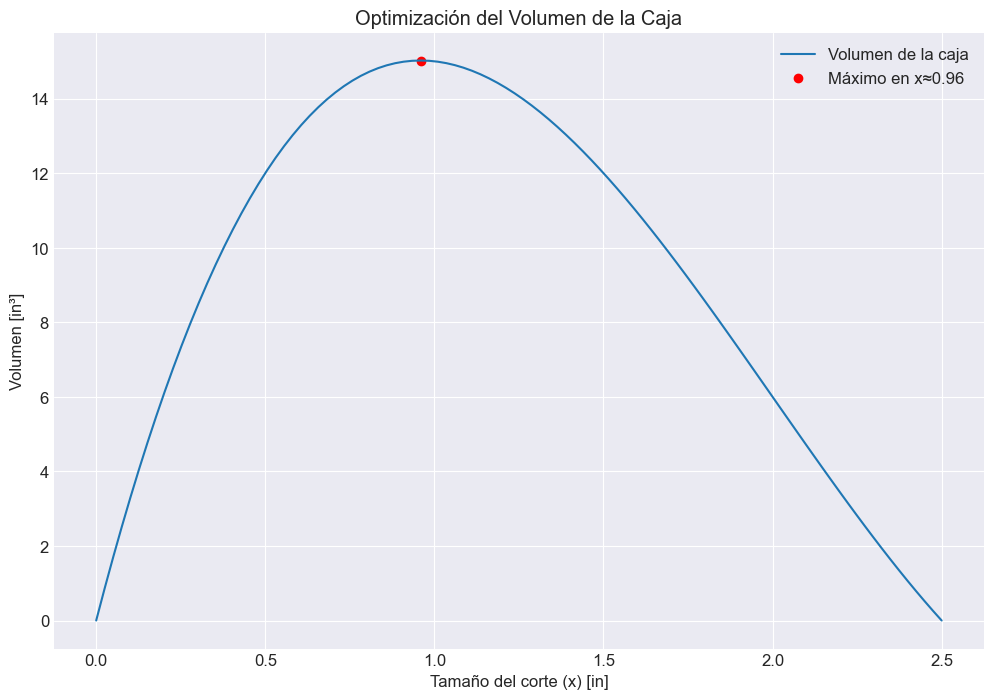

In [ ]:
def box_optimization():
    x = symbols('x')
    
    # Dimensiones originales
    length = 7
    width = 5
    
    # Volumen de la caja
    V = (length - 2*x)*(width - 2*x)*x
    V_expanded = V.expand()
    
    print("=== Paso 1: Modelado ===")
    print(f"Función de volumen: V(x) = {V}")
    print(f"Forma expandida: V(x) = {V_expanded}")
    
    # Derivada primera
    dVdx = diff(V, x)
    print("\n=== Paso 2: Derivación ===")
    print(f"Derivada: V'(x) = {dVdx}")
    
    # Puntos críticos
    critical_points = solve(Eq(dVdx, 0), x)
    print("\n=== Paso 3: Puntos Críticos ===")
    print(f"Soluciones: x = {critical_points}")
    
    # Evaluar puntos críticos
    valid_points = []
    for point in critical_points:
        # Verificar restricciones físicas
        if (width - 2*point) > 0 and (length - 2*point) > 0:
            valid_points.append(point)
    
    print("\n=== Paso 4: Validación ===")
    print(f"Puntos válidos: x = {valid_points}")
    
    # Prueba de la primera derivada
    test_values = [point - 0.1 for point in valid_points] + [point + 0.1 for point in valid_points]
    slopes = [dVdx.subs(x, val) for val in test_values]
    
    print("\n=== Paso 5: Análisis ===")
    for i, point in enumerate(valid_points):
        left_slope = slopes[i*2]
        right_slope = slopes[i*2+1]
        
        if left_slope > 0 and right_slope < 0: # type: ignore
            print(f"Máximo local en x ≈ {float(point):.2f}")
            optimal_x = point
        elif left_slope < 0 and right_slope > 0: # type: ignore
            print(f"Mínimo local en x ≈ {float(point):.2f}")
    
    # Resultado final
    optimal_volume = V.subs(x, optimal_x)
    print("\n=== Resultado ===")
    print(f"El volumen máximo es {float(optimal_volume):.2f} in³ cuando x ≈ {float(optimal_x):.2f} in")
    
    # Visualización
    x_vals = np.linspace(0, 2.5, 100)
    V_lamb = sp.lambdify(x, V, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, V_lamb(x_vals), label='Volumen de la caja')
    plt.scatter([float(optimal_x)], [float(optimal_volume)], color='red', label=f'Máximo en x≈{float(optimal_x):.2f}')
    plt.title('Optimización del Volumen de la Caja')
    plt.xlabel('Tamaño del corte (x) [in]')
    plt.ylabel('Volumen [in³]')
    plt.legend()
    plt.grid(True)
    plt.show()

box_optimization()


## 3. Tipos Comunes de Problemas de Optimización

### 3.1 Optimización Geométrica
**Ejemplo**: Encontrar las dimensiones de un rectángulo con perímetro fijo que maximice el área.

=== Optimización de Rectángulo ===
Área en función de x: A(x) = x*(20 - x)

Dimensiones óptimas:
x = 10 unidades
y = 10 unidades
Área máxima = 100 unidades cuadradas


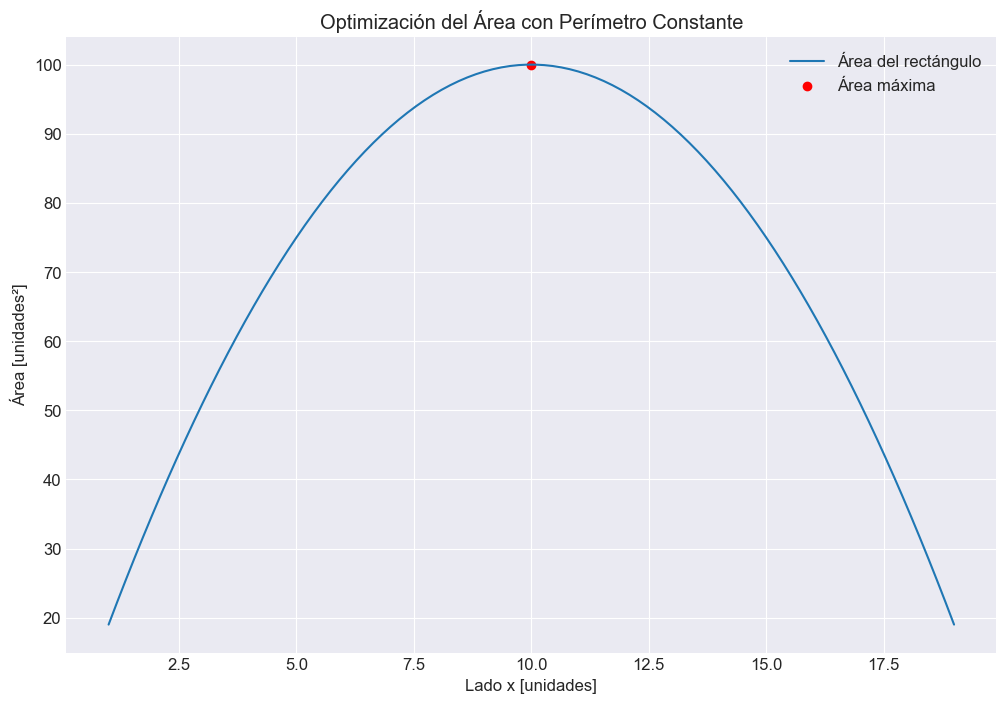

In [3]:
def rectangle_optimization():
    x = symbols('x')
    perimeter = 40  # Perímetro fijo
    
    # Relaciones
    # 2x + 2y = perimeter => y = (perimeter - 2x)/2
    y = (perimeter - 2*x)/2
    area = x * y
    
    print("=== Optimización de Rectángulo ===")
    print(f"Área en función de x: A(x) = {area}")
    
    # Derivada y puntos críticos
    dAdx = diff(area, x)
    critical_point = solve(Eq(dAdx, 0), x)[0]
    
    # Verificación
    y_val = y.subs(x, critical_point)
    max_area = area.subs(x, critical_point)
    
    print(f"\nDimensiones óptimas:")
    print(f"x = {critical_point} unidades")
    print(f"y = {y_val} unidades")
    print(f"Área máxima = {max_area} unidades cuadradas")
    
    # Visualización
    x_vals = np.linspace(1, 19, 100)
    area_lamb = sp.lambdify(x, area, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, area_lamb(x_vals), label='Área del rectángulo')
    plt.scatter([float(critical_point)], [float(max_area)], color='red', label='Área máxima')
    plt.title('Optimización del Área con Perímetro Constante')
    plt.xlabel('Lado x [unidades]')
    plt.ylabel('Área [unidades²]')
    plt.legend()
    plt.grid(True)
    plt.show()

rectangle_optimization()


### 3.2 Optimización en Economía
**Ejemplo**: Maximizar la utilidad dado el costo e ingresos.

=== Optimización de Utilidad ===
Función de utilidad: P(q) = -0.15*q**2 + 2*q - 100

Producción óptima: q = 6.66666666666667 unidades
Utilidad máxima = -93.3333333333333 dólares


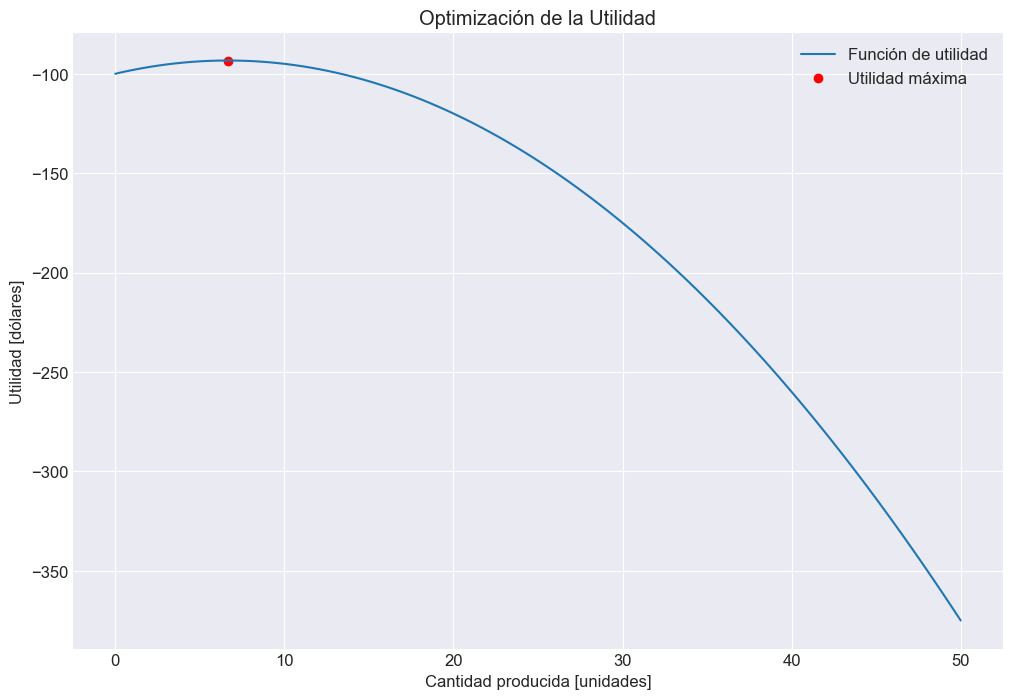

In [4]:
def profit_optimization():
    q = symbols('q')  # Cantidad producida
    
    # Funciones de costo e ingreso
    cost = 100 + 5*q + 0.1*q**2
    revenue = 7*q - 0.05*q**2
    profit = revenue - cost
    
    print("=== Optimización de Utilidad ===")
    print(f"Función de utilidad: P(q) = {profit}")
    
    # Derivada y puntos críticos
    dPdq = diff(profit, q)
    critical_point = solve(Eq(dPdq, 0), q)[0]
    max_profit = profit.subs(q, critical_point)
    
    print(f"\nProducción óptima: q = {critical_point} unidades")
    print(f"Utilidad máxima = {max_profit} dólares")
    
    # Visualización
    q_vals = np.linspace(0, 50, 100)
    profit_lamb = sp.lambdify(q, profit, 'numpy')
    
    plt.figure()
    plt.plot(q_vals, profit_lamb(q_vals), label='Función de utilidad')
    plt.scatter([float(critical_point)], [float(max_profit)], color='red', label='Utilidad máxima')
    plt.title('Optimización de la Utilidad')
    plt.xlabel('Cantidad producida [unidades]')
    plt.ylabel('Utilidad [dólares]')
    plt.legend()
    plt.grid(True)
    plt.show()

profit_optimization()


## 4. Estrategias Avanzadas de Optimización

### 4.1 Optimización con Restricciones
**Método**: Usar la restricción para reducir el número de variables.

### 4.2 Optimización Multivariable
**Técnica**: Usar derivadas parciales y gradientes.

## 5. Resumen Teórico Completo

| **Tipo de Problema**       | **Estrategia Clave**                          | **Ejemplo Típico**                          |
|----------------------------|---------------------------------------------|--------------------------------------------------|
| **Geométrico**             | Expresar todas las variables en términos de una sola | Maximizar área con perímetro fijo |
| **Económico**              | Derivar funciones de ingreso/costo/utilidad | Maximizar utilidad o minimizar costo |
| **Físico**                 | Relacionar variables mediante leyes físicas | Minimizar tiempo de recorrido |
| **De diseño**              | Considerar restricciones prácticas         | Diseñar contenedor con mínimo material |

## 6. Conclusión y Aplicaciones

Esta implementación cubre:
1. El proceso sistemático de optimización aplicada
2. Ejemplos concretos de diferentes dominios
3. Visualización de las funciones objetivo
4. Interpretación de resultados en contexto real

**Aplicaciones importantes**:
- Diseño de empaques y contenedores
- Planificación de producción industrial
- Optimización de rutas y recursos
- Diseño de estructuras eficientes



=== Optimización de Lata Cilíndrica ===
Radio óptimo: 3.84 cm
Altura óptima: 7.67 cm
Área superficial mínima: 277.55 cm²


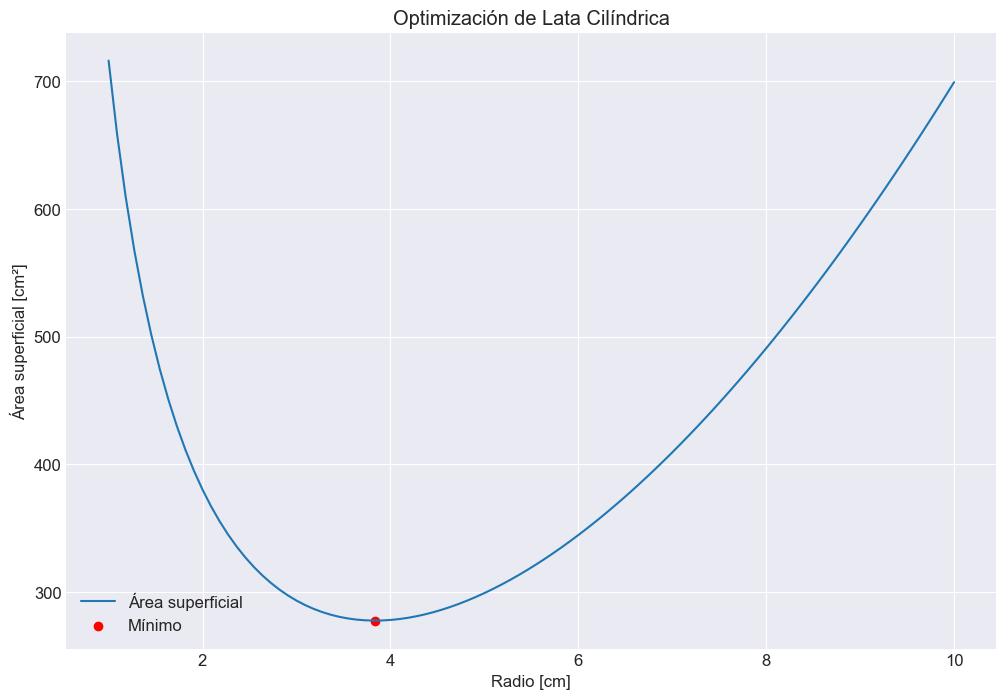

In [8]:
# Ejemplo integrado: Optimización de lata cilíndrica
def can_optimization():
    r = symbols('r')  # Radio
    h = symbols('h')  # Altura
    volume = 355  # cm³ (típica lata de refresco)
    
    # Restricción de volumen
    volume_eq = Eq(pi*r**2*h, volume)
    h_expr = solve(volume_eq, h)[0]
    
    # Área superficial (a minimizar)
    surface_area = 2*pi*r*h + 2*pi*r**2
    SA = surface_area.subs(h, h_expr)
    
    # Derivada y puntos críticos
    dSAdr = diff(SA, r)
    critical_point = solve(Eq(dSAdr, 0), r)[0]
    optimal_h = h_expr.subs(r, critical_point)
    min_SA = SA.subs(r, critical_point)
    
    print("\n=== Optimización de Lata Cilíndrica ===")
    print(f"Radio óptimo: {float(critical_point):.2f} cm")
    print(f"Altura óptima: {float(optimal_h):.2f} cm")
    print(f"Área superficial mínima: {float(min_SA):.2f} cm²")
    
    # Visualización
    r_vals = np.linspace(1, 10, 100)
    SA_lamb = sp.lambdify(r, SA, 'numpy')
    
    plt.figure()
    plt.plot(r_vals, SA_lamb(r_vals), label='Área superficial')
    plt.scatter([float(critical_point)], [float(min_SA)], color='red', label='Mínimo')
    plt.title('Optimización de Lata Cilíndrica')
    plt.xlabel('Radio [cm]')
    plt.ylabel('Área superficial [cm²]')
    plt.legend()
    plt.grid(True)
    plt.show()

can_optimization()
